In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set(style="darkgrid", rc={'figure.figsize':(30,10)})

### First, let's read our dataset:

In [2]:
data = pd.read_csv("../Datasets/TV_Campaign.csv",parse_dates=['Date'],dayfirst=True)

data.head()

,Campaign,Date,New Active Passengers,Tours,New User Registrations,App Downloads (Android and iOS)
0,NaN,2015-10-05,2529,20886,3810,3975
1,NaN,2015-10-06,2226,21045,3690,4110
2,NaN,2015-10-07,2355,22455,3927,4188
3,NaN,2015-10-08,2922,24504,5043,5433
4,NaN,2015-10-09,5202,29562,8493,9609


## Now for the questions provided in the Excel File.

#### We ran a TV campaign  with the goal of growing our customer base and want to find out about the impact it had on our customer acquisition kpis.

## A. Which measure or measures are most relevant to judge the success of the campaign.								

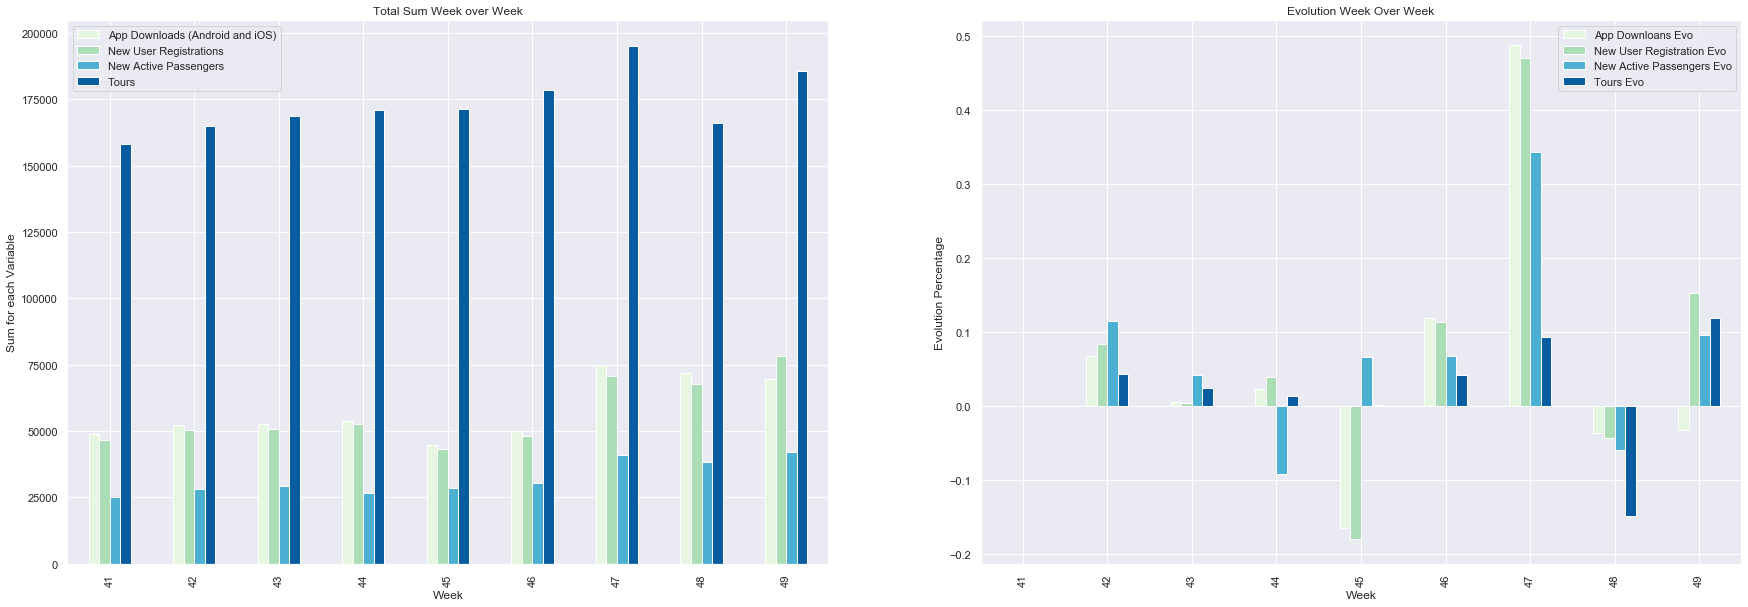

In [3]:
# To answer this question we will examine the historic evolution of App Downloads, New Active Passengers (NAP) and New User Registrations (NUR) throughout the dataset's timeframe.

# 1. Filtering the data.

df = data[['Date', 'New Active Passengers', 'Tours', 'New User Registrations', 'App Downloads (Android and iOS)']]

# 2. Parsing the date as Weeks of the year.

df['Week'] = df['Date'].dt.week

# 3. Study App Downloads, NUR, NAP, and Tours evolution in an WoW manner. Must be noted, Week 50 will not be considered due to only reporting two observation points, making graphic analysis look like there was a considerable Drop in all KPIs.

pivot = pd.DataFrame(
        data=pd.pivot_table(df, 
            values=['New User Registrations', 'New Active Passengers', 'App Downloads (Android and iOS)', 'Tours'],
                index=['Week'],
                    aggfunc={'New User Registrations': np.sum, 'New Active Passengers': np.sum, 'App Downloads (Android and iOS)': np.sum, 'Tours': np.sum}),
                        dtype=np.int64)

pivot = pivot[['App Downloads (Android and iOS)', 'New User Registrations', 'New Active Passengers', 'Tours']]

pivot['App Downloans Evo'] = pivot['App Downloads (Android and iOS)'].div(pivot['App Downloads (Android and iOS)'].shift(1)) - 1

pivot['New User Registration Evo'] = pivot['New User Registrations'].div(pivot['New User Registrations'].shift(1)) - 1

pivot['New Active Passengers Evo'] = pivot['New Active Passengers'].div(pivot['New Active Passengers'].shift(1)) - 1

pivot['Tours Evo'] = pivot['Tours'].div(pivot['Tours'].shift(1)) - 1

pivot.fillna(0)

fig, ax =plt.subplots(1,2)

pivot[['App Downloans Evo', 'New User Registration Evo', 'New Active Passengers Evo', 'Tours Evo']][:9].plot(
    kind='bar',
        colormap=ListedColormap(sns.color_palette("GnBu", 10)),
            ax=ax[1]).set(
                xlabel='Week', 
                    ylabel='Evolution Percentage', 
                        title='Evolution Week Over Week')

pivot[['App Downloads (Android and iOS)', 'New User Registrations', 'New Active Passengers', 'Tours']][:9].plot(
    kind='bar',
        colormap=ListedColormap(sns.color_palette("GnBu", 10)),
            stacked=False, 
                ax=ax[0]).set(
                    xlabel='Week', 
                        ylabel='Sum for each Variable', 
                            title='Total Sum Week over Week')
fig.show()


In [4]:
"""

Graphically, we can se the following:

[Total Sum Week Over Week]

- Week 47 and onwards, reports a positive bump in Total Sum of Downloads, New User Registrations, and New Active Passengers. However,Tours experienced a drop after   the first week of the Campaign Launch. Although Tours recovered a week later, the purpose of the Campaign was not to increase Tours, thus this topic will be relieved from further mention.

[Evolution Week Over Week]  

- Prior Week 47, the WoW Evolution of App Downloads, New User Registrations, and New Active Passengers did not have an evident pattern of performance. However,       Week 47 reports a considerable spike in said KPIs. 
- Said spike and further developments should be considered as complementary insights for the first graphic, this because it is evident that the Campaign positively   took App Downloads (AD), NUR, and NAP into a "higher echelon" from Week 47 and onwards.   

"""

'\n\nGraphically, we can se the following:\n\n[Total Sum Week Over Week]\n\n- Week 47 and onwards, reports a positive bump in Total Sum of Downloads, New User Registrations, and New Active Passengers. However,Tours experienced a drop after   the first week of the Campaign Launch. Although Tours recovered a week later, the purpose of the Campaign was not to increase Tours, thus this topic will be        relieved from further mention.\n\n[Evolution Week Over Week]  \n\n- Prior Week 47, the WoW Evolution of App Downloads, New User Registrations, and New Active Passengers did not have an evident pattern of performance. However,       Week 47 reports a considerable spike in said KPIs. \n- Said spike and further developments should be considered as complementary insights for the first graphic, this because it is evident that the Campaign positively   took App Downloads (AD), NUR, and NAP into a "higher echelon" from Week 47 and onwards.   \n\n'

### B. Identify the impact on activity that the TV campaign had while it was running. 								
	

In [5]:
# Taking the "Higher Echelon" point in the past answer, let's now study the average levels of App Downloads (AD), New User Registrations (NUR), and New Active Passengers (NAP) pre and during Campaign. 

# 1. Filtering the data.

dff = data[['Date', 'New Active Passengers', 'New User Registrations', 'App Downloads (Android and iOS)']]

# 2. Parsing the date as Weeks of the year.

dff['Week'] = dff['Date'].dt.week

# 3. Studying Average Levels pre and post Campaign. Must be noted, in order to achieve the most balanced comparation of scenarios, 3 Weeks prior to the Campaign's Launch Week will be considered as Pre-Campaign Scenario, and Weeks 47 to 49 will be considered as the Event Scenario (minor asumptions are taking place regarding the fact that the Campaign did not start exactly at the begining of Week 47, nor ended at the very end of Week 49). 

pivott = pd.DataFrame(
            data=pd.pivot_table(dff, 
                values=['New User Registrations', 'New Active Passengers', 'App Downloads (Android and iOS)'],
                    index=['Week'],
                        aggfunc={'New User Registrations': np.sum, 'New Active Passengers': np.sum, 'App Downloads (Android and iOS)': np.sum}),
                            dtype=np.int64)

impact = pd.DataFrame(
            data=round(pivott[3:5].mean(axis=0),0), 
                dtype=np.int64).rename(columns={0: "Pre-Campaign Average Weekly Performance"})

impact['Campaign Average Weekly Performance'] = pd.DataFrame(
            data=round(pivott[6:8].mean(axis=0),0), 
                dtype=np.int64)

impact = impact.reindex(['App Downloads (Android and iOS)', 'New User Registrations', 'New Active Passengers'])

impact['Impact'] = pd.Series(
            ["{0:.2f}%".format(val * 100) for val in (impact['Campaign Average Weekly Performance']/impact['Pre-Campaign Average Weekly Performance']-1)],                          index=impact.index)

impact

,Pre-Campaign Average Weekly Performance,Campaign Average Weekly Performance,Impact
App Downloads (Android and iOS),49302,73352,48.78%
New User Registrations,47996,69356,44.50%
New Active Passengers,27642,39712,43.67%


In [6]:
"""

Conclusions are as follows:

- Notably, the Campaign pushed App Downloads almost 50% above Regular Levels. 
- Moreover, New User Registrations and New Active Passengers where positively affected by this spike as well, 44.5 and 43.67 percent above Regular Levels to be       precise. 
- Finally, an interesting step towards our investigation will be to study the Passenger Acquisition Funnel, by checking the conversion rate through the 2 different   stages after a Passenger decides to Download the App. 

"""

'\n\nConclusions are as follows:\n\n- Notably, the Campaign pushed App Downloads almost 50% above Regular Levels. \n- Moreover, New User Registrations and New Active Passengers where positively affected by this spike as well, 44.5 and 43.67 percent above Regular Levels to be       precise. \n- Finally, an interesting step towards our investigation will be to study the Passenger Acquisition Funnel, by checking the conversion rate through the 2 different   stages after a Passenger decides to Download the App. \n\n'

In [7]:
# 4. Studying the Passenger Acquisition Funnel.

acquisition = impact[['Pre-Campaign Average Weekly Performance', 'Campaign Average Weekly Performance']]

acquisition['Pre-Campaign Conversion'] = pd.Series(
            ["{0:.2f}%".format(val * 100) for val in (acquisition['Pre-Campaign Average Weekly Performance']
                .div(acquisition['Pre-Campaign Average Weekly Performance'].shift(1)))],
                    index=impact.index)

acquisition['Campaign Conversion'] = pd.Series(
            ["{0:.2f}%".format(val * 100) for val in (acquisition['Campaign Average Weekly Performance']
                .div(acquisition['Campaign Average Weekly Performance'].shift(1)))],
                    index=impact.index)

acquisition = acquisition[['Pre-Campaign Average Weekly Performance','Pre-Campaign Conversion','Campaign Average Weekly Performance','Campaign Conversion']].replace(to_replace='nan%', value='-')

acquisition

,Pre-Campaign Average Weekly Performance,Pre-Campaign Conversion,Campaign Average Weekly Performance,Campaign Conversion
App Downloads (Android and iOS),49302,-,73352,-
New User Registrations,47996,97.35%,69356,94.55%
New Active Passengers,27642,57.59%,39712,57.26%


In [8]:
"""

Based on the above, a case could be made regarding the fact that even though Campaigns certainly bring more First Time Users, there are still Oportunity Areas in the realms of making every single New Register complete a ride with no more than an elapsed day from Registration untill Tour. 

"""

'\n\nBased on the above, a case could be made regarding the fact that even though Campaigns certainly bring more First Time Users, there are still Oportunity Areas in the realms of making every single New Register complete a ride with no more than an elapsed day from Registration untill Tour. \n\n'

### C. Assuming a total cost of 1 million euro for the campaign, what was the CPA through the campaign.							

In [13]:
# For this question, the exact duration of the Campaign is Case Sensitive, thus, let's study 17 Days Prior to the Campaign and the 17 Exact Days the Campaign lasted, so we can get a proper Cost Per Acquisition.

# 1. Filtering the data.

dfff = data[['Date', 'New Active Passengers', 'New User Registrations', 'App Downloads (Android and iOS)']]

# 2. Studying Average Levels pre and post Campaign.

pivottt = pd.DataFrame(
            data=pd.pivot_table(dfff, 
                values=['New User Registrations', 'New Active Passengers', 'App Downloads (Android and iOS)'],
                    index=['Date'],
                        aggfunc={'New User Registrations': np.sum, 'New Active Passengers': np.sum, 'App Downloads (Android and iOS)': np.sum}),
                            dtype=np.int64)

impactt = pd.DataFrame(
            data=round(pivottt[26:43].sum(axis=0),0), 
                dtype=np.int64).rename(columns={0: '17 Days Prior Performance'})

impactt['Campaign Performance'] = pd.DataFrame(
            data=round(pivottt[43:60].sum(axis=0),0), 
                dtype=np.int64)

impactt = impactt.reindex(['App Downloads (Android and iOS)', 'New User Registrations', 'New Active Passengers'])

impactt['Impact'] = impactt['Campaign Performance']-impactt['17 Days Prior Performance']

impactt

,17 Days Prior Performance,Campaign Performance,Impact
App Downloads (Android and iOS),120681,166638,45957
New User Registrations,117762,169332,51570
New Active Passengers,71871,91656,19785


In [14]:
print('Taking into account New User Registrations as the Prime Action for the Campaign, it is safe to say that the Cost Per Acquisition is EUR {:.2f}'.format(1000000/impactt['Impact'][1]))

Taking into account New User Registrations as the Prime Action for the Campaign, it is safe to say that the Cost Per Acquisition is EUR 19.39
